In [17]:
#AgriSmart AI Data Analysis
"""
OBJECTIVES:
1.Load and process the data set
2.Inspect the data for empty values, wrong data, types, wrong formats, duplicates and outliners
3.Analyze the data to find patterns and relationships (correlations)
4.Generate descriptive statistics.
5.Visualize the data(graphs) to understand trends and distributions.
6.Identify which variables most influence fertilizer recommendations.
7.Determine the crop type with the highest average soil moisture.
8.Suggest appropriate irrigation adjustments for crops experiencing average temperatures above 30°C.
9.Save the cleaned and processed data in a csv file for future use.
"""

'\nOBJECTIVES:\n1.Load and process the data set\n2.Inspect the data for empty values, wrong data, types, wrong formats, duplicates and outliners\n3.Analyze the data to find patterns and relationships (correlations)\n4.Generate descriptive statistics.\n5.Visualize the data(graphs) to understand trends and distributions.\n6.Identify which variables most influence fertilizer recommendations.\n7.Determine the crop type with the highest average soil moisture.\n8.Suggest appropriate irrigation adjustments for crops experiencing average temperatures above 30°C.\n9.Save the cleaned and processed data in a csv file for future use.\n'

In [18]:
#Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

df = pd.read_csv('climate_action_data.csv')
df.head()  # Display the first few rows of the dataset

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
0,SEN-1000,2025-01-01,36.22,6.98,21.3,50.4,Tomatoes,67.6,26.6,IMG-2000
1,SEN-1001,2025-01-02,76.55,5.03,23.5,34.3,Wheat,130.4,8.3,IMG-2001
2,SEN-1002,2025-01-03,61.24,6.52,21.9,54.6,Tomatoes,36.0,29.4,IMG-2002
3,SEN-1003,2025-01-04,51.91,6.62,24.0,48.7,Maize,85.8,19.6,IMG-2003
4,SEN-1004,2025-01-05,20.92,5.98,19.2,70.6,Wheat,75.6,29.9,IMG-2004


In [19]:
#the statistics
df.describe() #here because all the data types are still objets.

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
count,913,909,913,913,913,913,909,913,913,913
unique,800,798,750,313,170,448,5,595,243,800
top,SEN-1430,2026-09-10,error,7.54,19.1,56.0,Wheat,66.9,8.0,IMG-2430
freq,2,2,5,11,13,8,203,8,11,2


In [20]:
#check data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Sensor_ID                      913 non-null    object
 1   Date                           909 non-null    object
 2   Soil_Moisture(%)               913 non-null    object
 3   Soil_pH                        913 non-null    object
 4   Temperature(C)                 913 non-null    object
 5   Humidity(%)                    913 non-null    object
 6   Crop_Type                      909 non-null    object
 7   Fertilizer_Recommended(kg/ha)  913 non-null    object
 8   Irrigation_Recommended(mm)     913 non-null    object
 9   Drone_Image_ID                 913 non-null    object
dtypes: object(10)
memory usage: 71.5+ KB


In [21]:
#number of rows and columns
df.shape

(913, 10)

In [29]:
#replacing 'error' with NaN
df.replace('error', np.nan, inplace=True)

In [22]:
#check for missing values or null values
print(df.isnull().sum())

Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


In [23]:
#handle missing values
#numerical columns
numeric_cols=['Soil_Moisture(%)','Soil_pH','Temperature(C)','Humidity(%)','Fertilizer_Recommended(kg/ha)','Irrigation_Recommended(mm)']
for col in numeric_cols:
    if col in df.columns:
        
        #this makes it easy to get the median for the cells with numbers and fill the empty ones with NaN.
        df[col] = pd.to_numeric(df[col],errors='coerce') #Convert to numeric,and anywhere else without a number coerce it with NaN
        
        #fill NaN cells with fillna using median
        df[col] = df[col].fillna(df[col].median())
        
#crop type has some empty cells
categorical_cols = ['Crop_Type']
for col in categorical_cols:
    if col in df.columns:
        #fill NaN cells with the mode
        df[col] = df[col].fillna(df[col].mode()[0])
        
#check again for missing values.
print("Missing values after handling :")
print(df.isnull().sum())
        

Missing values after handling :
Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


In [24]:
#handle wrong date formats and missing dates
#Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
#since the dates are in chronological order,we can use the date before to fill in a Nat date
df['Date'] = df['Date'].fillna(method='ffill') #forward fill

#check again for missing values.
print("Missing values after handling :")
print(df.isnull().sum())


Missing values after handling :
Sensor_ID                        0
Date                             0
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


C:\Users\Wanyana\AppData\Local\Temp\ipykernel_14000\879510078.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Date'] = df['Date'].fillna(method='ffill') #forward fill


In [25]:
#Wrong data types
numerical_cols=['Soil_Moisture(%)','Soil_pH','Temperature(C)','Humidity(%)','Fertilizer_Recommended(kg/ha)','Irrigation_Recommended(mm)']

#deviations beyond +3 are outliers - use standard devition to remove them.
for col in numerical_cols:
    if col in df.columns:
        #remove outliers (beyond 3 standard deviations)
        mean = df[col].mean()
        std = df[col].std()
        df[col] =np.where((df[col]<mean-3*std) | (df[col]>mean+3*std),np.nan, df[col])
        #after removing the outliers fill them with median
        df[col] = df[col].fillna(df[col].median())

In [34]:
#ensure correct data types
df = df.astype({
    'Sensor_ID': 'string',
    'Soil_Moisture(%)': 'float64',
    'Soil_pH': 'float64',
    'Temperature(C)': 'float64',
    'Humidity(%)': 'float64',
    'Crop_Type': 'string',
    'Fertilizer_Recommended(kg/ha)': 'float64',
    'Irrigation_Recommended(mm)': 'float64',
    'Drone_Image_ID': 'string'
})

In [26]:
#Check for duplicates - Number of duplicate rows
print("Number of duplicate rows: ",df.duplicated().sum())

Number of duplicate rows:  111


In [27]:
#remove duplicates - use drop
df =df.drop_duplicates()
print("Number of rows after removing duplicates:",df.shape[0])

Number of rows after removing duplicates: 802


In [28]:
#Duplicate sensors are handled differently as the primary key.
print("Number of duplicate sensors:",df['Sensor_ID'].duplicated().sum())
#Remove duplicate sensor IDs
df =df.drop_duplicates(subset=['Sensor_ID'], keep ='first')
#shape
df.shape

Number of duplicate sensors: 2


(800, 10)

In [35]:
print("\nDescriptive statistics:")
print(df.describe())


Descriptive statistics:
                      Date  Soil_Moisture(%)     Soil_pH  Temperature(C)  \
count                  800        800.000000  800.000000      800.000000   
mean   2026-02-04 11:54:36         44.792281    6.250406       26.477875   
min    2025-01-01 00:00:00         10.350000    4.520000       18.000000   
25%    2025-07-19 18:00:00         26.962500    5.330000       22.375000   
50%    2026-02-04 12:00:00         45.230000    6.285000       26.600000   
75%    2026-08-23 06:00:00         62.587500    7.080000       30.600000   
max    2027-03-11 00:00:00         79.980000    8.000000       35.000000   
std                    NaN         20.458669    1.021431        4.858215   

       Humidity(%)  Fertilizer_Recommended(kg/ha)  Irrigation_Recommended(mm)  
count   800.000000                     800.000000                  800.000000  
mean     60.064250                      87.484000                   17.370875  
min      30.000000                      30.000000 

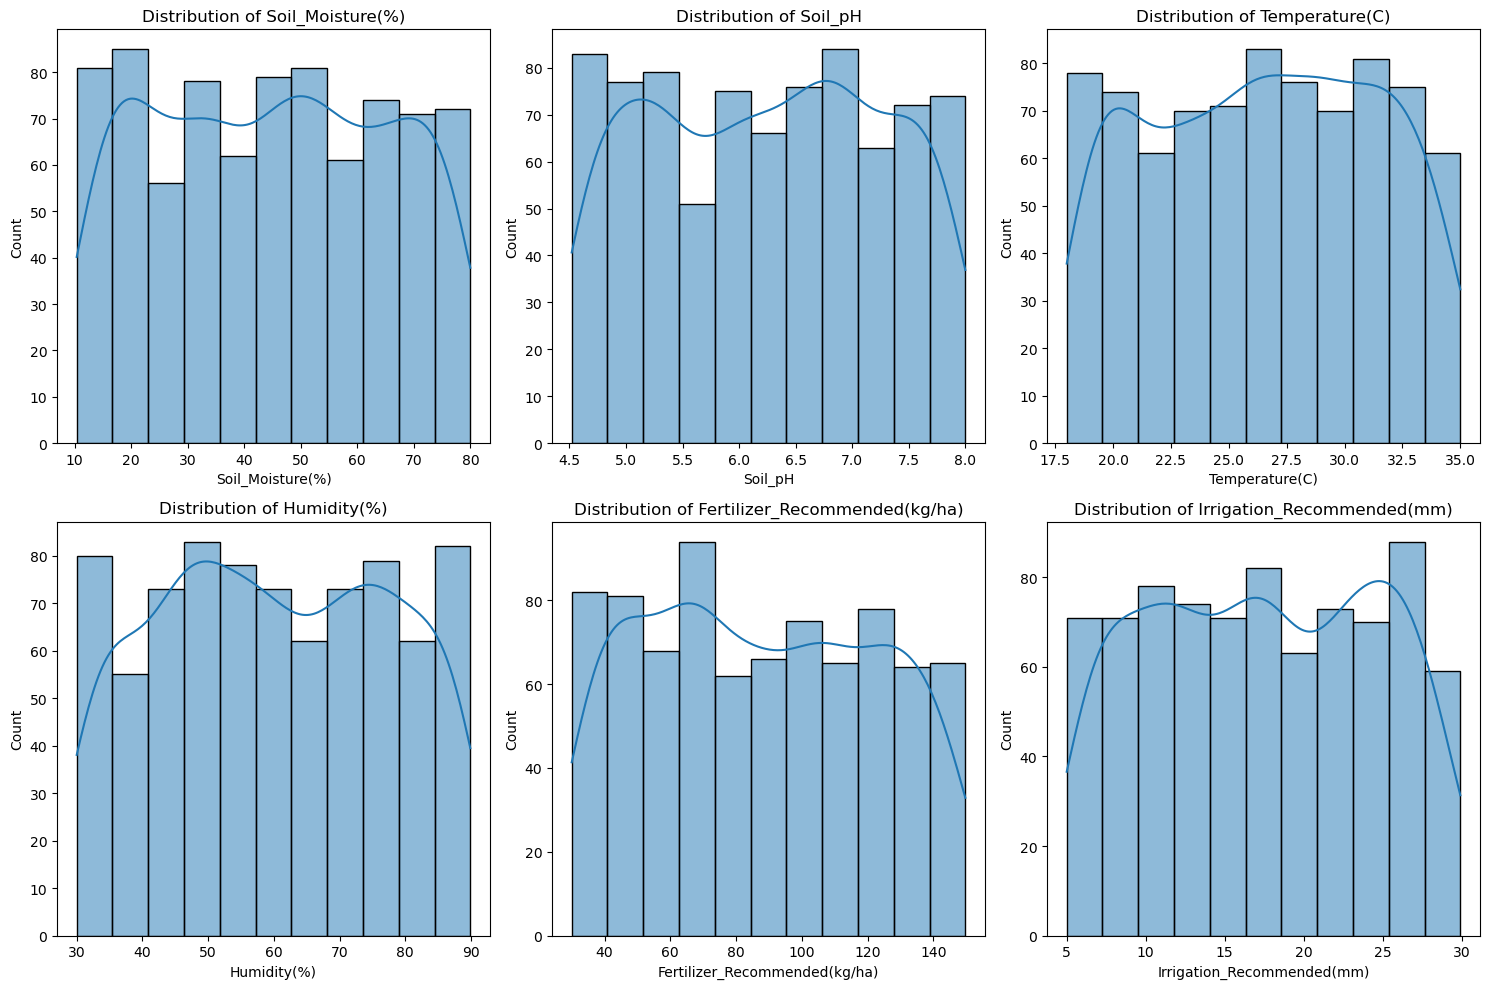

In [36]:
numeric_cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 
                'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

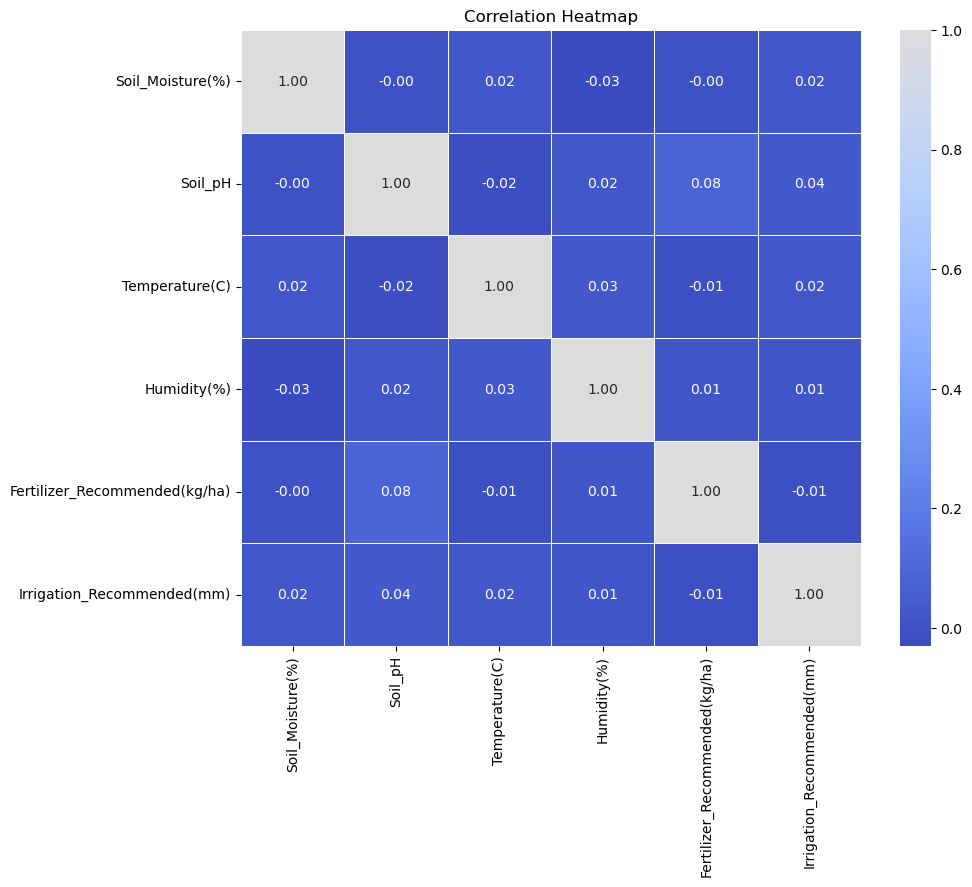

In [38]:
# calculate correlation matrix
corr_matrix = df[['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 
                'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, center=True)
plt.title('Correlation Heatmap')
plt.show()

In [42]:
#Variables influencing fertilizer recommendations
print("\nCorrelation with Fertilizer Recommendations:")
print(corr_matrix['Fertilizer_Recommended(kg/ha)'].sort_values(ascending=False))



Correlation with Fertilizer Recommendations:
Fertilizer_Recommended(kg/ha)    1.000000
Soil_pH                          0.083839
Humidity(%)                      0.014937
Soil_Moisture(%)                -0.003494
Temperature(C)                  -0.008180
Irrigation_Recommended(mm)      -0.013475
Name: Fertilizer_Recommended(kg/ha), dtype: float64


In [46]:
print("\nAverage soil moisture by crop type:")
print(df.groupby('Crop_Type')['Soil_Moisture(%)'].mean().sort_values(ascending=False))

#crop type with the highest average soil moisture
print('\n')
highest_avg_moisture_crop = df.groupby('Crop_Type')['Soil_Moisture(%)'].mean().idxmax()
print(f"Crop type with the highest average soil moisture: {highest_avg_moisture_crop}")


Average soil moisture by crop type:
Crop_Type
Wheat       47.356449
Maize       44.953581
Beans       44.337781
Tomatoes    43.985419
Lettuce     42.984868
Name: Soil_Moisture(%), dtype: float64


Crop type with the highest average soil moisture: Wheat


In [47]:
high_temp_crops = df[df['Temperature(C)'] > 30]
print("\nAverage irrigation recommendations for crops >30°C:")
print(high_temp_crops.groupby('Crop_Type')['Irrigation_Recommended(mm)'].mean())

# Suggested adjustments
print("\nSuggested irrigation adjustments:")
for crop in high_temp_crops['Crop_Type'].unique():
    current_avg = high_temp_crops[high_temp_crops['Crop_Type'] == crop]['Irrigation_Recommended(mm)'].mean()
    suggested = current_avg * 1.2  # Increase by 20%
    print(f"{crop}: Current avg {current_avg:.1f}mm → Suggested {suggested:.1f}mm")


Average irrigation recommendations for crops >30°C:
Crop_Type
Beans       17.857692
Lettuce     16.297297
Maize       16.625455
Tomatoes    18.919565
Wheat       18.645946
Name: Irrigation_Recommended(mm), dtype: float64

Suggested irrigation adjustments:
Lettuce: Current avg 16.3mm → Suggested 19.6mm
Maize: Current avg 16.6mm → Suggested 20.0mm
Wheat: Current avg 18.6mm → Suggested 22.4mm
Tomatoes: Current avg 18.9mm → Suggested 22.7mm
Beans: Current avg 17.9mm → Suggested 21.4mm


In [ ]:
"""
RECOMMENDATIONS:
1. Ensure regular monitoring of soil moisture and temperature to adjust irrigation and fertilizer recommendations.
2. Implement a data validation process to prevent incorrect data entry.
3. Consider using machine learning models to predict fertilizer and irrigation needs based on historical data.
4. Explore the use of drones for real-time monitoring and data collection to enhance precision agriculture.

"""

In [48]:
#save the cleaned and processed data to a new CSV file
df.to_csv('cleaned_climate_action_data.csv', index=False)